# See seismic data

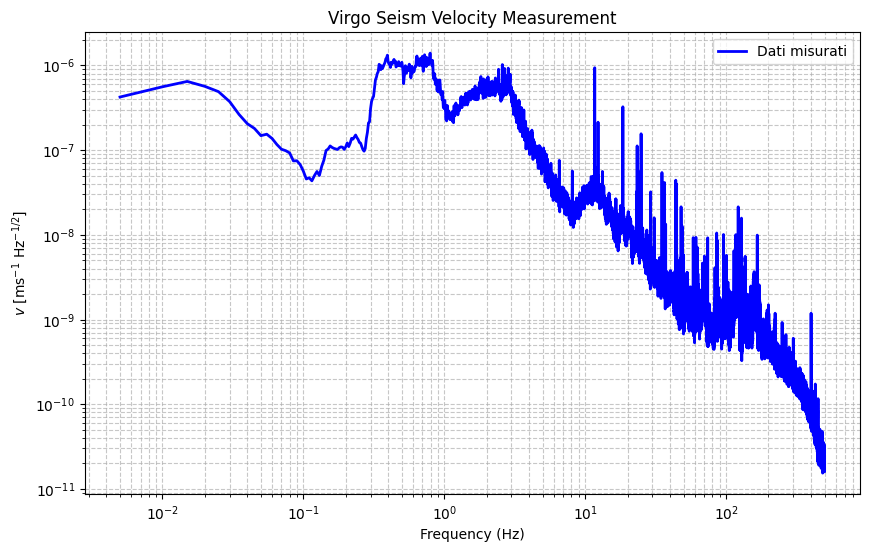

In [3]:
import numpy as np
import matplotlib.pyplot as plt

datafilename = 'ENV_NEB_SEIS_V__FFT.txt'

# Caricamento dei dati dal file
try:
    datav = np.loadtxt(datafilename)  # Carica i dati dal file
    freq = datav[:, 0]  # Colonna 0: frequenze (Hz)
    v_spec = datav[:, 1]     # Colonna 1: velocità (ms^-1 * Hz^-1/2)
except Exception as e:
    print(f"Errore durante il caricamento del file: {e}")
    exit()

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.title('Virgo Seism Velocity Measurement')
plt.loglog(freq, v_spec, label='Dati misurati', color='blue', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$v$ [ms$^{-1}$ Hz$^{-1/2}$]')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


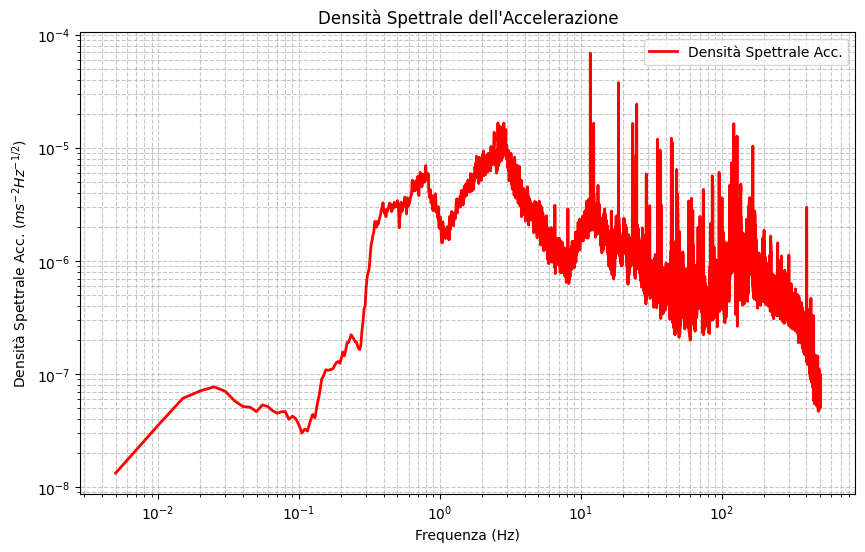

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


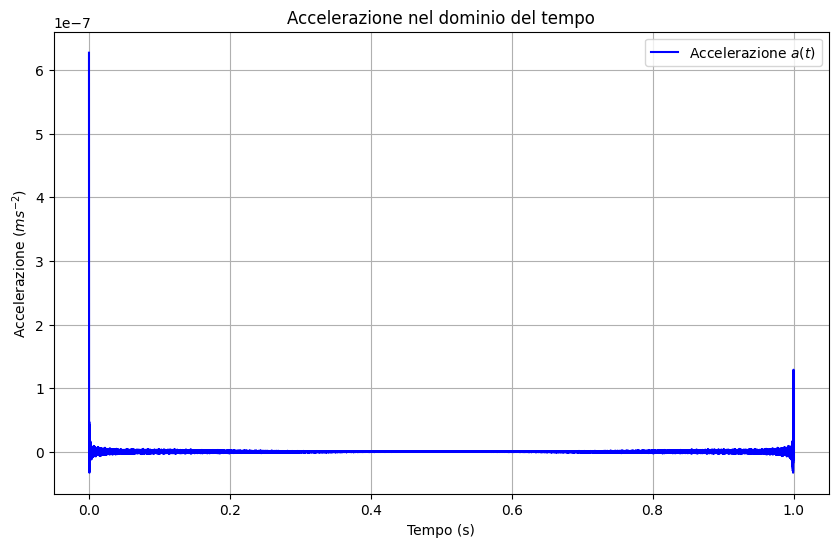

In [6]:

# 1. Calcolo dell'accelerazione nel dominio delle frequenze
a_spec = 2 * np.pi * freq * v_spec  # ms^-2 * Hz^-1/2

# 2. Ricostruzione dell'accelerazione nel dominio del tempo
# Assumiamo un segnale complesso con fase casuale per la ricostruzione
rng = np.random.default_rng()
random_phase = rng.uniform(0, 2 * np.pi, len(freq))
# Rimuovere la fase casuale, consideriamo solo l'ampiezza
complex_spectrum_no_phase = np.abs(a_spec)  # solo l'ampiezza, senza fase

# Trasformata inversa senza fase
a_time = np.fft.ifft(complex_spectrum_no_phase)
time = np.linspace(0, 1, len(a_time))  # Simuliamo un secondo di dati

# 3. Plot della densità spettrale dell'accelerazione
plt.figure(figsize=(10, 6))
plt.loglog(freq, a_spec, label='Densità Spettrale Acc.', color='red', linewidth=2)
plt.xlabel('Frequenza (Hz)')
plt.ylabel('Densità Spettrale Acc. ($ms^{-2} Hz^{-1/2}$)')
plt.title('Densità Spettrale dell\'Accelerazione')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 4. Plot dell'accelerazione nel dominio del tempo
plt.figure(figsize=(10, 6))
plt.plot(time, a_time, label='Accelerazione $a(t)$', color='blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Accelerazione ($ms^{-2}$)')
plt.title('Accelerazione nel dominio del tempo')
plt.grid(True)
plt.legend()
plt.show()


##Calcolo accelerazione
a(f) = (2 π f)^2 ⋅ v(f)

a(t) = *F*^-1[ a(f)]


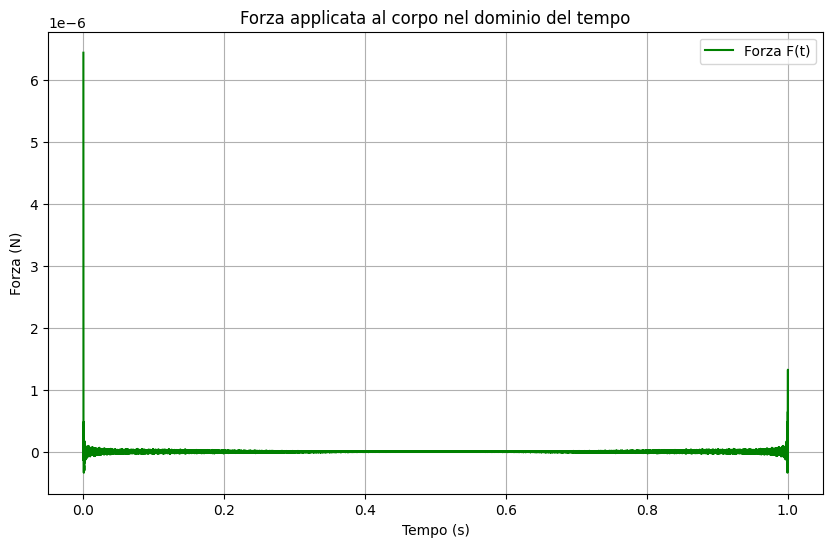

In [7]:
# Calcolo della massa totale
mass = 8.6 + 0.0569 + 1.6145  # Massa totale in kg

# Calcoliamo la forza applicata al corpo (F = m * a(t))
force = mass * a_time  # a_time è l'accelerazione nel dominio del tempo che hai già calcolato

# Plot della forza
plt.figure(figsize=(10, 6))
plt.plot(time, force, label='Forza F(t)', color='green')
plt.xlabel('Tempo (s)')
plt.ylabel('Forza (N)')
plt.title('Forza applicata al corpo nel dominio del tempo')
plt.grid(True)
plt.legend()
plt.show()
